# Supplier Performance Analysis
- Week05
- dataset: PurchasesFINAL12312016.csv

## Pre-processing

#### Load dataset

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px



In [96]:
data = pd.read_csv('/Users/naega_da_2gim/Downloads/(3-2)고려대/고급비즈니스어낼리틱스/과제제출/W05/PurchasesFINAL12312016-1.csv')

data.head()


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


### Change Dtype

In [98]:
df = data.copy()

In [99]:
pd.to_datetime(df['PODate'])

0         2015-12-21
1         2015-12-22
2         2015-12-22
3         2015-12-22
4         2015-12-24
             ...    
2372469   2016-12-19
2372470   2016-12-19
2372471   2016-12-19
2372472   2016-12-19
2372473   2016-12-19
Name: PODate, Length: 2372474, dtype: datetime64[ns]

#### Change to DateTime
-  Multiple columns: Apply pd.to_datetime to each column in the list

In [100]:
date_col = ['PODate', 'ReceivingDate', 'InvoiceDate','PayDate']
df[date_col] = df[date_col].apply(pd.to_datetime)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           int64         
 2   Brand           int64         
 3   Description     object        
 4   Size            object        
 5   VendorNumber    int64         
 6   VendorName      object        
 7   PONumber        int64         
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  int64         
dtypes: datetime64[ns](4), float64(2), int64(6), object(4)
memory usage: 289.6+ MB


### Change to Str

In [102]:
str_col = ['Store','Brand','Classification','VendorNumber','PONumber']
df[str_col] = df[str_col].astype(str)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           object        
 2   Brand           object        
 3   Description     object        
 4   Size            object        
 5   VendorNumber    object        
 6   VendorName      object        
 7   PONumber        object        
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  object        
dtypes: datetime64[ns](4), float64(2), int64(1), object(9)
memory usage: 289.6+ MB


### Feature Engineering

#### 1. Lead Time
- Lead Time=Invoice Date−PO Delivery Date
- Change Dtypes: Timedelta -> integer

In [104]:
(df['InvoiceDate'] - df['ReceivingDate']).dt.days

0           2
1           6
2           5
3           6
4           7
           ..
2372469    12
2372470    13
2372471    14
2372472    14
2372473    12
Length: 2372474, dtype: int64

In [105]:
# Change Dtypes: Timedelta -> integer
df['LeadTime'] = (df['InvoiceDate'] - df['ReceivingDate']).dt.days

In [106]:
df[['InvoiceDate', 'ReceivingDate', 'LeadTime']].head()

,InvoiceDate,ReceivingDate,LeadTime
0,2016-01-04,2016-01-02,2
1,2016-01-07,2016-01-01,6
2,2016-01-07,2016-01-02,5
3,2016-01-07,2016-01-01,6
4,2016-01-09,2016-01-02,7


In [107]:
df['LeadTime'].describe()

count    2.372474e+06
mean     8.872578e+00
std      2.975602e+00
min      1.000000e+00
25%      7.000000e+00
50%      9.000000e+00
75%      1.100000e+01
max      1.500000e+01
Name: LeadTime, dtype: float64

#### 2. Order Time(Lead Time)
- Order Time (Lead Time)=PO Delivery Date−Purchase Date
- Change Dtypes: Timedelta -> integer: dt.days

In [108]:
df['OrderTime'] = (df['ReceivingDate'] - df['PODate']).dt.days

In [109]:
df[['PODate','ReceivingDate','OrderTime']].head()

,PODate,ReceivingDate,OrderTime
0,2015-12-21,2016-01-02,12
1,2015-12-22,2016-01-01,10
2,2015-12-22,2016-01-02,11
3,2015-12-22,2016-01-01,10
4,2015-12-24,2016-01-02,9


In [110]:
df['OrderTime'].describe()

count    2.372474e+06
mean     7.620739e+00
std      2.208890e+00
min      3.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.400000e+01
Name: OrderTime, dtype: float64

"""Red Flags:
Invoice Issued Before Delivery: If the invoice date is earlier than the delivery date, this could be a data entry error or indicate that the invoice was issued prematurely (before goods/services were delivered), which could be a red flag for some businesses"""

In [111]:
((df['InvoiceDate'] - df['ReceivingDate']) < pd.Timedelta(0)).value_counts()

False    2372474
Name: count, dtype: int64

#### 3. Payment Lead Time
- Payment Lead Time=PayDate−InvoiceDate
- Change Dtypes: Timedelta -> integer: dt.days

In [112]:
df['PaymentLT'] = (df['PayDate'] - df['InvoiceDate']).dt.days


In [113]:
df['PaymentLT'].describe()

count    2.372474e+06
mean     3.565881e+01
std      6.062932e+00
min      2.300000e+01
25%      3.100000e+01
50%      3.600000e+01
75%      4.100000e+01
max      4.800000e+01
Name: PaymentLT, dtype: float64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           object        
 2   Brand           object        
 3   Description     object        
 4   Size            object        
 5   VendorNumber    object        
 6   VendorName      object        
 7   PONumber        object        
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  object        
 16  LeadTime        int64         
 17  OrderTime       int64         
 18  PaymentLT       int64         
dtypes: datetime64[ns](4), float64(2), int64(4), object(9)
memory usage: 343.9+ MB


### Text Split - Inventory ID

In [115]:
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,2,12,43
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,6,10,45
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,5,11,45
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,6,10,45
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,7,9,38


In [116]:
df['InventoryId']

0             69_MOUNTMEND_8412
1              30_CULCHETH_5255
2             34_PITMERDEN_5215
3           1_HARDERSFIELD_5255
4             76_DONCASTER_2034
                   ...         
2372469       49_GARIGILL_22298
2372470    1_HARDERSFIELD_19556
2372471     66_EANVERNESS_22297
2372472      69_MOUNTMEND_19557
2372473      55_DRY GULCH_22298
Name: InventoryId, Length: 2372474, dtype: object

#### Split by '_'

In [117]:
#### Split by '_' and expand into separate columns
df['InventoryId'].str.split('_', expand=True)

,0,1,2
0,69,MOUNTMEND,8412
1,30,CULCHETH,5255
2,34,PITMERDEN,5215
3,1,HARDERSFIELD,5255
4,76,DONCASTER,2034
...,...,...,...
2372469,49,GARIGILL,22298
2372470,1,HARDERSFIELD,19556
2372471,66,EANVERNESS,22297
2372472,69,MOUNTMEND,19557


In [118]:
df[['Split_1', 'InventoryCategory', 'Split_3']] = df['InventoryId'].str.split('_', expand=True)

In [119]:
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,...,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT,Split_1,InventoryCategory,Split_3
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,...,35.71,6,214.26,1,2,12,43,69,MOUNTMEND,8412
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,9.35,4,37.40,1,6,10,45,30,CULCHETH,5255
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,...,9.41,5,47.05,1,5,11,45,34,PITMERDEN,5215
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,9.35,6,56.10,1,6,10,45,1,HARDERSFIELD,5255
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,...,21.32,5,106.60,1,7,9,38,76,DONCASTER,2034


#### Drop columns

In [120]:
# Drop columns

df = df.drop(columns=['Split_1', 'Split_3'])

In [121]:
df.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification',
       'LeadTime', 'OrderTime', 'PaymentLT', 'InventoryCategory'],
      dtype='object')

In [122]:
df['InventoryCategory'].value_counts()

#Find strange 1726 with ''

InventoryCategory
DONCASTER       217917
MOUNTMEND       182223
EANVERNESS      166601
GOULCREST       132805
HORNSEY         100801
                 ...  
LEWES             6666
AYLESBURY         5379
TYWARDREATH       4087
KNIFE'S EDGE      3974
                  1726
Name: count, Length: 69, dtype: int64

#### Check Null value

In [123]:
df['InventoryCategory'].isna().value_counts()

InventoryCategory
False    2372474
Name: count, dtype: int64

In [124]:
#Check '' value 
(df['InventoryCategory'] =='').value_counts()

InventoryCategory
False    2370748
True        1726
Name: count, dtype: int64

In [125]:
df[df['InventoryCategory'] == ''][['InventoryId','InventoryCategory']]

,InventoryId,InventoryCategory
983466,46__5255,
983474,46__5215,
983510,46__3472,
983534,46__4075,
983559,46__4179,
...,...,...
1544209,81__23289,
1544249,81__23325,
1544319,81__23286,
1544402,81__23324,


#### Drop '' empty string value

In [126]:
df1 = df.copy()

In [127]:
#Drop df['InventoryCategory'] == '' ; empty string 

df1 = df[df['InventoryCategory'] != '']

In [128]:
print(df.shape, df1.shape)

(2372474, 20) (2370748, 20)


In [129]:
df1.select_dtypes(include=[float, int])

,PurchasePrice,Quantity,Dollars,LeadTime,OrderTime,PaymentLT
0,35.71,6,214.26,2,12,43
1,9.35,4,37.40,6,10,45
2,9.41,5,47.05,5,11,45
3,9.35,6,56.10,6,10,45
4,21.32,5,106.60,7,9,38
...,...,...,...,...,...,...
2372469,8.06,12,96.72,12,9,28
2372470,9.39,12,112.68,13,8,28
2372471,6.75,12,81.00,14,7,28
2372472,9.39,12,112.68,14,7,28


#### Numerical features / Categorical features / Date features

In [130]:
df1.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification',
       'LeadTime', 'OrderTime', 'PaymentLT', 'InventoryCategory'],
      dtype='object')

In [131]:
df1.select_dtypes(include=['datetime']).columns.to_list()

['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

In [132]:
numerical_features =  df1.select_dtypes(include=[float, int]).columns.to_list()
date_features = df1.select_dtypes(include=['datetime']).columns.to_list()
categorical_features =  df1.columns.difference(numerical_features + date_features).to_list()

print(numerical_features)
print(date_features)
print(categorical_features)

['PurchasePrice', 'Quantity', 'Dollars', 'LeadTime', 'OrderTime', 'PaymentLT']
['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']
['Brand', 'Classification', 'Description', 'InventoryCategory', 'InventoryId', 'PONumber', 'Size', 'Store', 'VendorName', 'VendorNumber']


In [133]:
# Check columns
print(len(numerical_features + date_features + categorical_features))
print(len(df1.columns))

20
20


## 시각화 1: 공급업체별 평균 리드 타임 순위 (Top/Bottom N)

/var/folders/_2/38_0hjf147923fm1mt565b6w0000gn/T/ipykernel_41050/3337120162.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




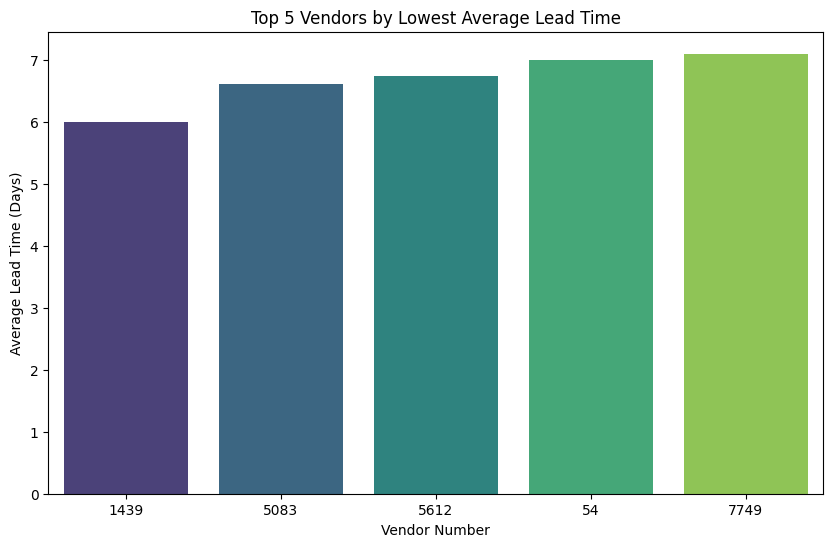

In [134]:
# 1. 공급업체별 평균 리드 타임 계산
vendor_lead_time = df.groupby('VendorNumber')['LeadTime'].mean().sort_values(ascending=True)

# 2. 평균 리드 타임이 가장 낮은 상위 5개 공급업체 선택
top5_best_vendors = vendor_lead_time.head(5).reset_index(name='AverageLeadTime')

# 3. 시각화 (matplotlib/seaborn 또는 plotly 사용)
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorNumber', y='AverageLeadTime', data=top5_best_vendors, palette='viridis')
plt.title('Top 5 Vendors by Lowest Average Lead Time')
plt.xlabel('Vendor Number')
plt.ylabel('Average Lead Time (Days)')
plt.xticks(rotation=0)
plt.show()

## 시각화 2: 핵심 공급업체의 시간 경과에 따른 리드 타임 추이

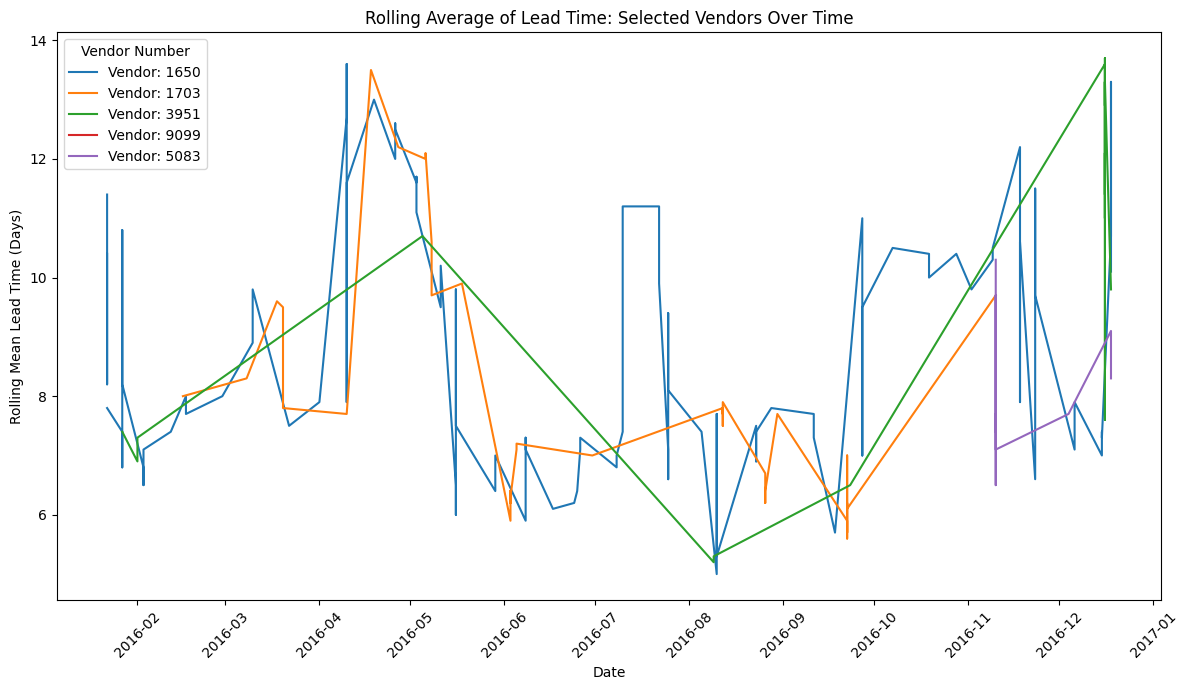

In [135]:
# Plot the rolling mean for each selected Vendor
plt.figure(figsize=(12, 7))

# 'filtered_top5_good_vendor'의 고유한 VendorNumber 각각에 대해 추이 플롯
for vendor in filtered_top5_good_vendor['VendorNumber'].unique():
    vendor_data = filtered_top5_good_vendor[filtered_top5_good_vendor['VendorNumber'] == vendor].sort_values('PODate')
    plt.plot(vendor_data['PODate'], vendor_data['RollingMeanLeadTime'], label=f'Vendor: {vendor}')

# Add title and labels
plt.title('Rolling Average of Lead Time: Selected Vendors Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Lead Time (Days)')
plt.legend(title='Vendor Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 시각화 3: 분류(Classification)별 구매 주문 건수 추이

In [137]:
# Group by PODate and Classification to count
podate_att = df1.groupby(['PODate', 'Classification']).size().reset_index(name='Counts')
podate_att['PODate'] = pd.to_datetime(podate_att['PODate']) # 날짜 형식 변환 필수

# Create the line plot
fig = px.line(podate_att, 
              x='PODate', 
              y='Counts', 
              color='Classification', 
              title='Purchase Order Counts by Date and Classification',
              labels={'Counts': 'PO Counts', 'PODate': 'Date'})

fig.show()

## 시각화 4: 공급업체별/품목별 평균 구매 단가 분포 분석


최종 시각화 데이터 (df_plot) 크기: (965137, 20)


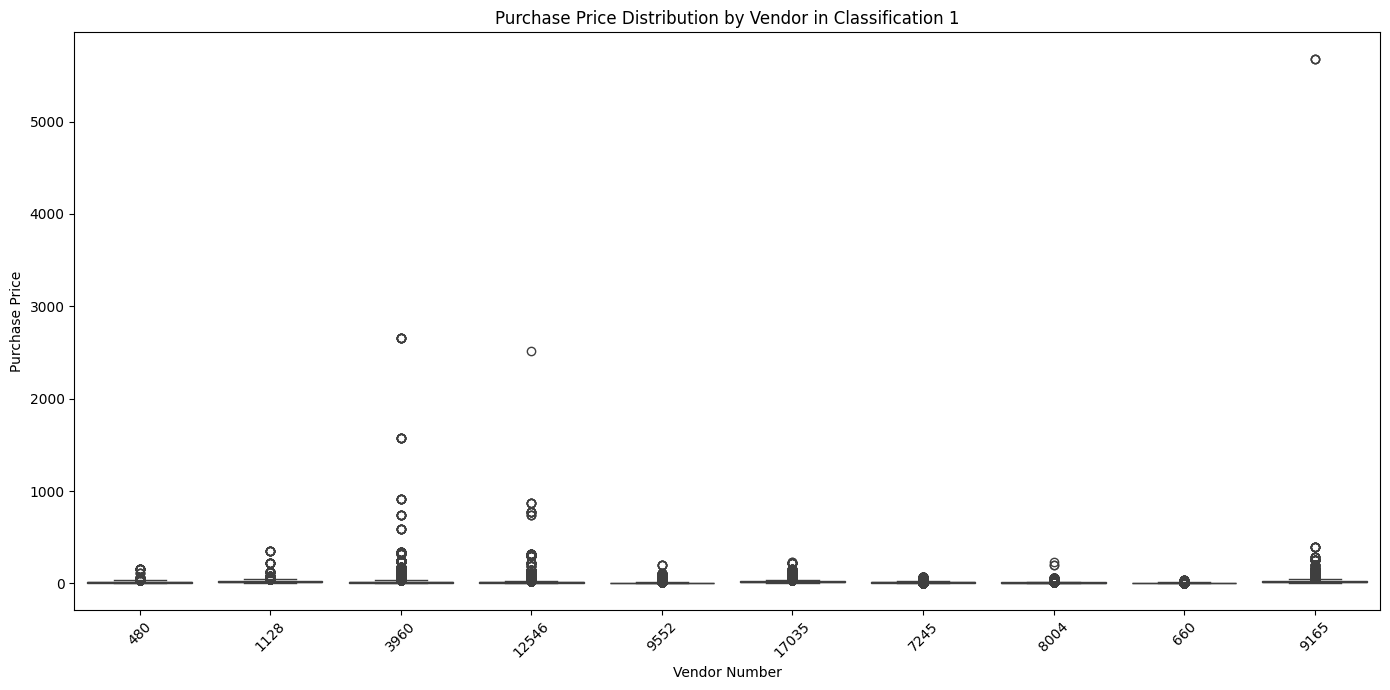

In [ ]:
# 1. 분석할 대상 분류를 '1'로 수정
target_classification = '1' 

# 2. 분류 필터링
df_target = df[df['Classification'] == target_classification].copy() 

# 3. 해당 분류 내 상위 10개 공급업체 선택
top_vendors = df_target['VendorNumber'].value_counts().nlargest(10).index

# 4. 최종 df_plot 생성
df_plot = df_target[df_target['VendorNumber'].isin(top_vendors)].copy()

# 5. PurchasePrice 열을 숫자형으로 변환 및 NaN 제거
df_plot['PurchasePrice'] = pd.to_numeric(
    df_plot['PurchasePrice'], 
    errors='coerce' # 변환 불가능한 값은 NaN으로 처리
)
df_plot.dropna(subset=['PurchasePrice'], inplace=True) 

# 6. 최종 df_plot 데이터 크기 확인 (0이 아닌지 확인)
print(f"\n최종 시각화 데이터 (df_plot) 크기: {df_plot.shape}")

# 7. 시각화 실행
plt.figure(figsize=(14, 7))
sns.boxplot(x='VendorNumber', y='PurchasePrice', data=df_plot)
plt.title(f'Purchase Price Distribution by Vendor in Classification {target_classification}')
plt.xlabel('Vendor Number')
plt.ylabel('Purchase Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 시각화 5: 리드 타임과 구매 수량/비용 간의 산점도 분석

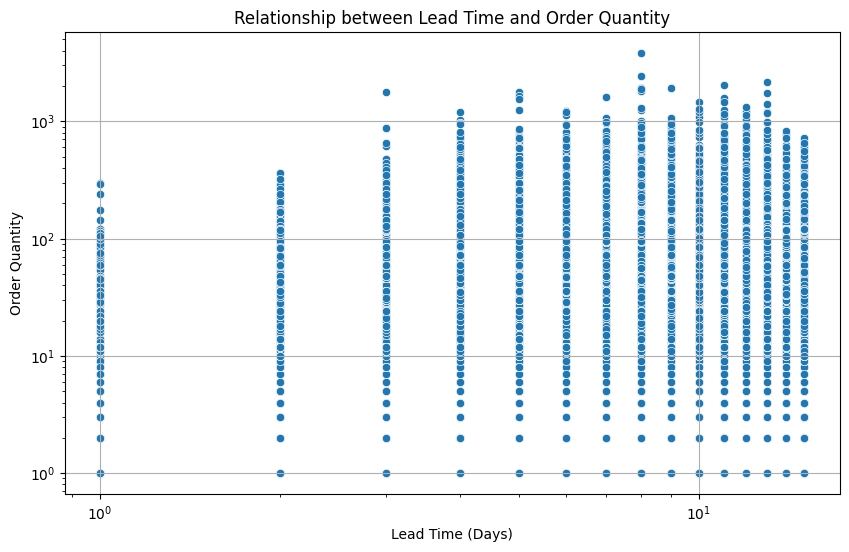

In [ ]:
plt.figure(figsize=(10, 6))
# 리드 타임과 수량의 관계 시각화
sns.scatterplot(x='LeadTime', y='Quantity', data=df) 
plt.title('Relationship between Lead Time and Order Quantity')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Order Quantity')
plt.xscale('log') # 리드 타임 분포가 skewed된 경우 로그 스케일 적용 가능
plt.yscale('log') # 수량 분포가 skewed된 경우 로그 스케일 적용 가능
plt.grid(True)
plt.show()